In [85]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno
import os
import glob

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)


In [8]:
os.getcwd()

'c:\\Users\\kmedr\\My Drive\\Projects\\omdenasa_muv'

In [9]:
file_list = os.path.join("C:/Users/kmedr/My Drive/Projects/omdenasa_muv/merge_data", "*.csv")
file_list = glob.glob(file_list)

In [10]:
df_crime_rate = pd.concat([pd.read_csv(f) for f in file_list ], ignore_index=True)
df_crime_rate

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0
1,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
2,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
3,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6.0
4,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3.0
...,...,...,...,...,...,...,...
1121729,30/06/2022,WILLASTON,5118,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0
1121730,30/06/2022,WOODCROFT,5162,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
1121731,30/06/2022,WOODVILLE NORTH,5012,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1.0
1121732,30/06/2022,NaN,NaN,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,4.0


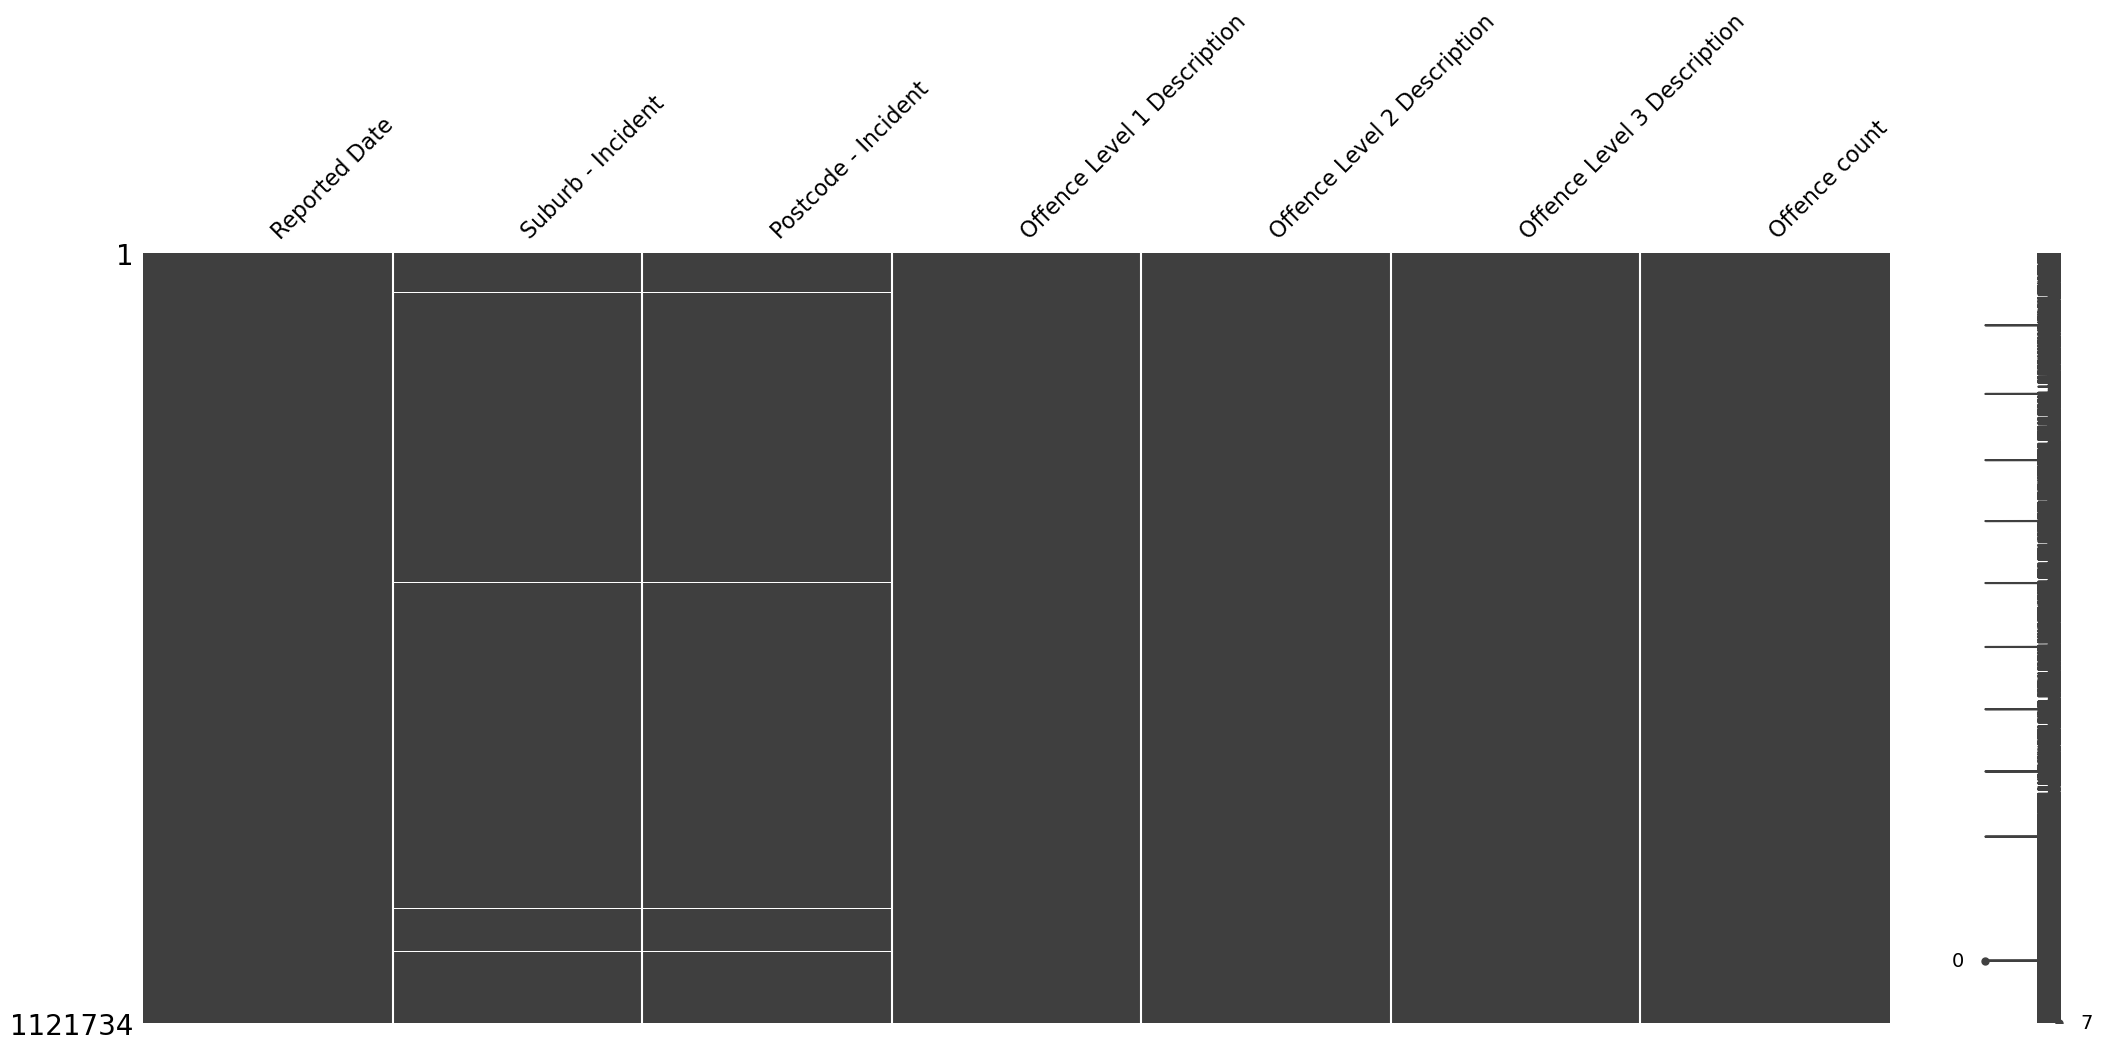

In [11]:
msno.matrix(df_crime_rate);

In [12]:
df_crime_rate.isnull().sum().sort_values(ascending=False)

Postcode - Incident            5088
Suburb - Incident              3090
Reported Date                    10
Offence Level 1 Description      10
Offence Level 2 Description      10
Offence Level 3 Description      10
Offence count                    10
dtype: int64

In [13]:
print(
    'We have a total of:',
    sum(df_crime_rate.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 8228 missing values.


In [14]:
length_before = len(df_crime_rate)
df_crime_rate.dropna(inplace=True)
lnth = (length_before - len(df_crime_rate)) / length_before
df_crime_rate.reset_index(drop=True)
print(f'We have dropped only {lnth:.2%} of the rows.')

We have dropped only 0.46% of the rows.


In [15]:
print(
    'We have a total of:',
    sum(df_crime_rate.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 0 missing values.


In [16]:
print(f'Number of duplicated rows:', df_crime_rate.duplicated().sum())
print(f'Rows and columns:', df_crime_rate.shape)

Number of duplicated rows: 1
Rows and columns: (1116594, 7)


In [17]:
df_crime_rate.drop_duplicates(inplace=True)
df_crime_rate.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_crime_rate.duplicated().sum())
print(f'Rows and columns:', df_crime_rate.shape)

Number of duplicated rows: 0
Rows and columns: (1116593, 7)


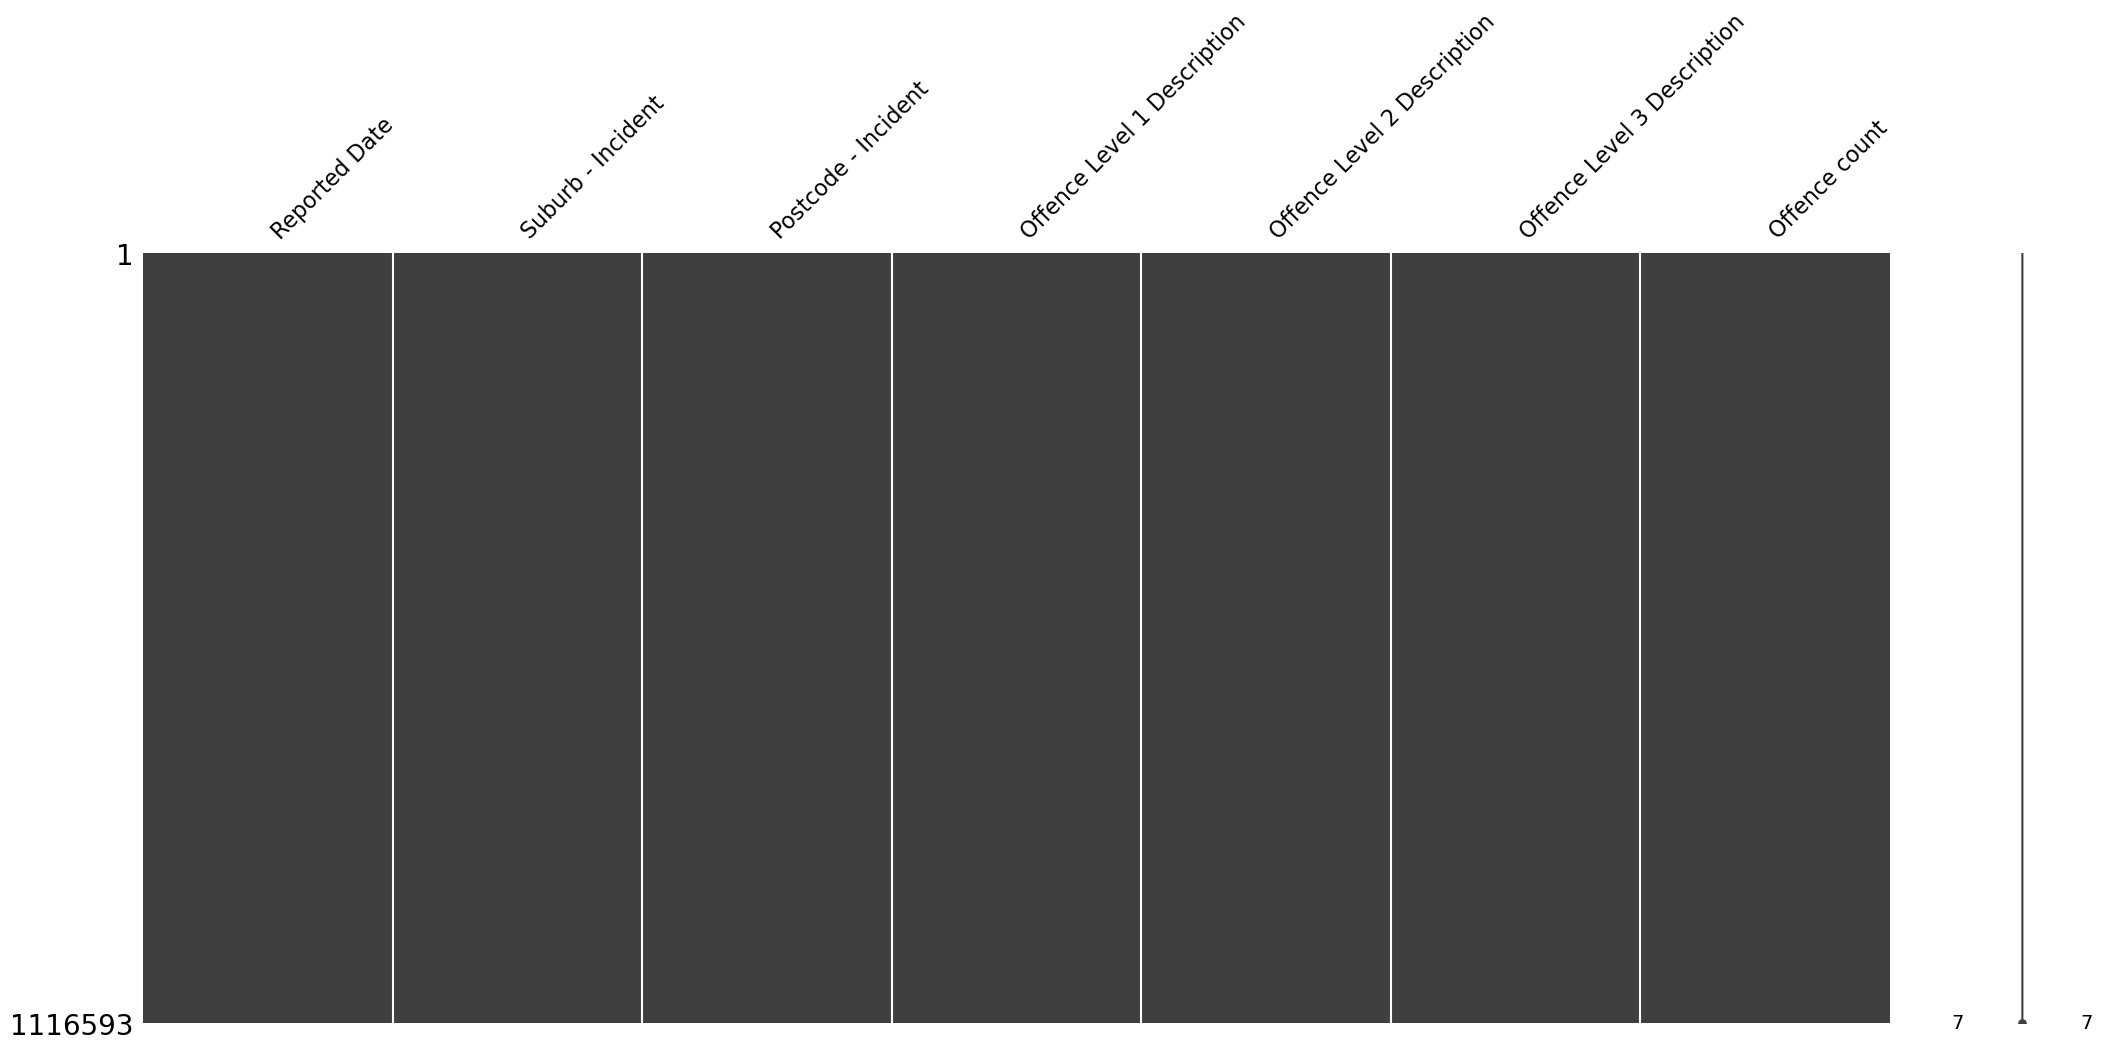

In [18]:
msno.matrix(df_crime_rate);

In [19]:
df_crime_rate.to_csv('data/crime_rate_2010_2021.csv', encoding='UTF8', header=True)

In [20]:
df_crime_rate.to_parquet('data/crime_rate_2010_2021.parquet', engine='fastparquet', compression='GZIP')

In [21]:
# import pandas
import pandas as pd
# import sweetviz
import sweetviz as sv
# load the parquet on the google drive into a dataframe
df = pd.read_parquet("data\crime_rate_2010_2021.parquet")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Reported Date                1116593 non-null  object 
 1   Suburb - Incident            1116593 non-null  object 
 2   Postcode - Incident          1116593 non-null  object 
 3   Offence Level 1 Description  1116593 non-null  object 
 4   Offence Level 2 Description  1116593 non-null  object 
 5   Offence Level 3 Description  1116593 non-null  object 
 6   Offence count                1116593 non-null  float64
dtypes: float64(1), object(6)
memory usage: 59.6+ MB


In [23]:
df.columns

Index(['Reported Date', 'Suburb - Incident', 'Postcode - Incident',
       'Offence Level 1 Description', 'Offence Level 2 Description',
       'Offence Level 3 Description', 'Offence count'],
      dtype='object')

In [24]:
df.columns= df.columns.str.lower()
df.columns = df.columns.str.replace(' - ', '_')
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['reported_date', 'suburb_incident', 'postcode_incident',
       'offence_level_1_description', 'offence_level_2_description',
       'offence_level_3_description', 'offence_count'],
      dtype='object')

In [25]:
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%d/%m/%Y')
df['offence_count'] = df['offence_count'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   reported_date                1116593 non-null  datetime64[ns]
 1   suburb_incident              1116593 non-null  object        
 2   postcode_incident            1116593 non-null  object        
 3   offence_level_1_description  1116593 non-null  object        
 4   offence_level_2_description  1116593 non-null  object        
 5   offence_level_3_description  1116593 non-null  object        
 6   offence_count                1116593 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 55.4+ MB


In [26]:
for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 100):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

reported_date : 4383


suburb_incident : 1746


postcode_incident : 447


offence_level_1_description : 2
offence_level_1_description : ['OFFENCES AGAINST PROPERTY' 'OFFENCES AGAINST THE PERSON']


offence_level_2_description : 9
offence_level_2_description : ['FRAUD DECEPTION AND RELATED OFFENCES'
 'PROPERTY DAMAGE AND ENVIRONMENTAL' 'SERIOUS CRIMINAL TRESPASS'
 'THEFT AND RELATED OFFENCES' 'ACTS INTENDED TO CAUSE INJURY'
 'ROBBERY AND RELATED OFFENCES' 'SEXUAL ASSAULT AND RELATED OFFENCES'
 'OTHER OFFENCES AGAINST THE PERSON' 'HOMICIDE AND RELATED OFFENCES']


offence_level_3_description : 29
offence_level_3_description : ['Obtain benefit by deception' 'Other property damage and environmental'
 'SCT - Non Residence' 'Other theft' 'Theft from shop' 'Common Assault'
 'Property damage by fire or explosion'
 'Serious Assault resulting in injury' 'SCT - Residence'
 'Theft from motor vehicle' 'Other unlawful entry with intent'
 'Theft/Illegal Use of MV' 'Serious Assault not resulting in in

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   reported_date                1116593 non-null  datetime64[ns]
 1   suburb_incident              1116593 non-null  object        
 2   postcode_incident            1116593 non-null  object        
 3   offence_level_1_description  1116593 non-null  object        
 4   offence_level_2_description  1116593 non-null  object        
 5   offence_level_3_description  1116593 non-null  object        
 6   offence_count                1116593 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 55.4+ MB


In [28]:
df['month'] = df['reported_date'].apply(lambda x:x.month)
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)
df['year'] = df['reported_date'].apply(lambda x:x.year)

In [29]:
df

,reported_date,suburb_incident,postcode_incident,offence_level_1_description,offence_level_2_description,offence_level_3_description,offence_count,month,year
0,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2,Jul,2010
1,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2,Jul,2010
2,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1,Jul,2010
3,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6,Jul,2010
4,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3,Jul,2010
...,...,...,...,...,...,...,...,...,...
1116588,2022-06-30,WHYALLA STUART,5608,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1,Jun,2022
1116589,2022-06-30,WILLASTON,5118,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1,Jun,2022
1116590,2022-06-30,WILLASTON,5118,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,Jun,2022
1116591,2022-06-30,WOODCROFT,5162,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,Jun,2022


In [80]:
df6 = pd.read_csv('merge_data/2010-11-data_sa_crime.csv')
df6

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0
1,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
2,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
3,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6.0
4,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3.0
...,...,...,...,...,...,...,...
105292,30/06/2011,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
105293,30/06/2011,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1.0
105294,30/06/2011,WYNN VALE,5127,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
105295,30/06/2011,WYNN VALE,5127,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft/Illegal Use of MV,1.0


In [82]:
df6['Offence Level 3 Description'].value_counts(dropna=False, ascending=False)

Other property damage and environmental        20778
Other theft                                    18492
Theft from motor vehicle                        9838
SCT - Residence                                 8994
Common Assault                                  6130
SCT - Non Residence                             5940
Serious Assault not resulting in injury         5601
Graffiti                                        4636
Theft from shop                                 4586
Theft/Illegal Use of MV                         4367
Other unlawful entry with intent                2321
Property damage by fire or explosion            2088
Obtain benefit by deception                     1868
Abduction, harassment and other offences        1616
Serious Assault resulting in injury             1397
Threatening behaviour                           1357
Receive or handle proceeds of crime             1143
Aggravated robbery                               792
Assault police                                

In [58]:
df['suburb_incident'].to_csv('data/sub.csv', encoding='UTF8', header=True)

In [31]:
df['postcode_incident'].value_counts(ascending=False)

5108    37058
5112    35321
5000    34637
5113    26801
5114    26759
        ...  
3379        1
2228        1
3180        1
2486        1
2850        1
Name: postcode_incident, Length: 447, dtype: int64

In [32]:
df2 = pd.read_csv('data/zip_to_lat_lon_Africa.csv')
df2

,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent
0,DZ,1000,Adrar Rp,Adrar,1,NaN,NaN,NaN,NaN,28.0700,0.1158,1.0,Algeria,Africa
1,DZ,1000,Tililane,Adrar,1,NaN,NaN,NaN,NaN,28.0700,0.1158,1.0,Algeria,Africa
2,DZ,1000,Ouled Oungal,Adrar,1,NaN,NaN,NaN,NaN,28.0700,0.1158,1.0,Algeria,Africa
3,DZ,1000,Ouled Ali,Adrar,1,NaN,NaN,NaN,NaN,28.0700,0.1158,1.0,Algeria,Africa
4,DZ,1000,Meraguen,Adrar,1,NaN,NaN,NaN,NaN,28.0700,0.1158,1.0,Algeria,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20530,ZA,9982,Luckhoff,NaN,NaN,NaN,NaN,NaN,NaN,-29.7500,24.7833,4.0,South Africa,Africa
20531,ZA,9986,Luckhoff,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,NaN,South Africa,Africa
20532,ZA,9986,Koffiefontein,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,4.0,South Africa,Africa
20533,ZA,9987,Koffiefontein,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,4.0,South Africa,Africa


In [33]:
df2.isnull().sum().sort_values(ascending=False)

community                 20390
communitycode             20390
province_or_county        19899
province_or_countycode    19899
state                      3920
statecode                  3920
accuracy                   1670
country code                  0
postal code                   0
place                         0
latitude                      0
longitude                     0
Country                       0
Continent                     0
dtype: int64

In [34]:
df3=df2[df2['country code'] == 'ZA']
df3

,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent
16615,ZA,2,Pretoria,NaN,NaN,NaN,NaN,NaN,NaN,-25.7069,28.2294,NaN,South Africa,Africa
16616,ZA,3,Pretoria,NaN,NaN,NaN,NaN,NaN,NaN,-25.7069,28.2294,4.0,South Africa,Africa
16617,ZA,4,Pretoria,NaN,NaN,NaN,NaN,NaN,NaN,-25.7069,28.2294,4.0,South Africa,Africa
16618,ZA,5,Pretoria,NaN,NaN,NaN,NaN,NaN,NaN,-25.7069,28.2294,4.0,South Africa,Africa
16619,ZA,6,Pretoria,NaN,NaN,NaN,NaN,NaN,NaN,-25.7069,28.2294,4.0,South Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20530,ZA,9982,Luckhoff,NaN,NaN,NaN,NaN,NaN,NaN,-29.7500,24.7833,4.0,South Africa,Africa
20531,ZA,9986,Luckhoff,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,NaN,South Africa,Africa
20532,ZA,9986,Koffiefontein,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,4.0,South Africa,Africa
20533,ZA,9987,Koffiefontein,NaN,NaN,NaN,NaN,NaN,NaN,-29.4000,25.0167,4.0,South Africa,Africa


In [35]:
df3.isnull().sum().sort_values(ascending=False)

state                     3920
statecode                 3920
province_or_county        3920
province_or_countycode    3920
community                 3920
communitycode             3920
accuracy                  1387
country code                 0
postal code                  0
place                        0
latitude                     0
longitude                    0
Country                      0
Continent                    0
dtype: int64

In [36]:
df3 = df3[['country code', 'postal code', 'latitude', 'longitude']]
df3

,country code,postal code,latitude,longitude
16615,ZA,2,-25.7069,28.2294
16616,ZA,3,-25.7069,28.2294
16617,ZA,4,-25.7069,28.2294
16618,ZA,5,-25.7069,28.2294
16619,ZA,6,-25.7069,28.2294
...,...,...,...,...
20530,ZA,9982,-29.7500,24.7833
20531,ZA,9986,-29.4000,25.0167
20532,ZA,9986,-29.4000,25.0167
20533,ZA,9987,-29.4000,25.0167


In [49]:
df3[df3['postal code'] == '2']

,country code,postal code,latitude,longitude
16615,ZA,2,-25.7069,28.2294


In [38]:
df4 = pd.read_csv('data/SouthAfricanCities.csv', encoding='ansi')
df4

,City,AccentCity,ProvinceName,Latitude,Longitude,ProvinceID
0,gqaka,Gqaka,Eastern Cape,-31.553917,28.210587,5
1,gqaqala,Gqaqala,Eastern Cape,-31.275246,28.422504,5
2,gqiba,Gqiba,Eastern Cape,-32.293342,28.686302,5
3,gqobonco,Gqobonco,Eastern Cape,-31.623649,28.255605,5
4,gqogqora,Gqogqora,Eastern Cape,-31.466667,28.533333,5
...,...,...,...,...,...,...
12670,gowe,Gowe,Limpopo,-24.597728,30.168979,9
12671,goxe,Goxe,KwaZulu Natal,-30.610205,29.220571,2
12672,goxe,Goxe,Eastern Cape,-30.697539,29.603320,5
12673,gqabati,Gqabati,Eastern Cape,-31.552806,28.594719,5


In [60]:
df4[df4['City'] == 'salisbury']

,City,AccentCity,ProvinceName,Latitude,Longitude,ProvinceID


In [66]:
df5 = pd.read_csv('data/worldcities.csv')
df5

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [68]:
df5 = df5[df5['country'] == 'South Africa']

In [69]:
df5

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
174,Johannesburg,Johannesburg,-26.2044,28.0416,South Africa,ZA,ZAF,Gauteng,admin,4434827.0,1710550792
545,Soweto,Soweto,-26.2678,27.8586,South Africa,ZA,ZAF,Gauteng,NaN,1271628.0,1710627007
639,Vereeniging,Vereeniging,-26.6736,27.9319,South Africa,ZA,ZAF,Gauteng,NaN,1074000.0,1710271883
716,Pretoria,Pretoria,-25.7464,28.1881,South Africa,ZA,ZAF,Gauteng,primary,741651.0,1710176249
739,Cape Town,Cape Town,-33.9250,18.4250,South Africa,ZA,ZAF,Western Cape,primary,433688.0,1710680650
...,...,...,...,...,...,...,...,...,...,...,...
38622,Riviersonderend,Riviersonderend,-34.1500,19.9000,South Africa,ZA,ZAF,Western Cape,NaN,5245.0,1710437145
40262,Onrus,Onrus,-34.4122,19.1700,South Africa,ZA,ZAF,Western Cape,NaN,5151.0,1710903983
42035,Pofadder,Pofadder,-29.1286,19.3947,South Africa,ZA,ZAF,Northern Cape,NaN,4220.0,1710817164
42145,Alexander Bay,Alexander Bay,-28.6083,16.5033,South Africa,ZA,ZAF,Northern Cape,NaN,1500.0,1710616152


In [71]:
df5[df5['city'] == 'Woodcroft']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


In [91]:
xls = pd.ExcelFile('data/crime-statistics-20152016.xlsx')

In [95]:
df7 = pd.read_excel(xls, 0).T
df7.sample(n=20)

0                 1     \
Unnamed: 0                              NaN               NaN   
Unnamed: 45                             NaN               NaN   
Unnamed: 20                             NaN               NaN   
Unnamed: 4                              NaN               NaN   
Province.2                     Eastern Cape        Mpumalanga   
Unnamed: 25                             NaN               NaN   
Unnamed: 54                             NaN               NaN   
Unnamed: 37                             NaN               NaN   
Station / Province.1               Aberdeen         Acornhoek   
Unnamed: 14                             NaN               NaN   
Murder                Total Sexual Offences  Attempted murder   
Unnamed: 38                             NaN               NaN   
Unnamed: 23                             NaN               NaN   
Unnamed: 30                             NaN               NaN   
Unnamed: 28                             NaN               NaN   
Province                       Eastern Cape        Mpumalanga   
CLUSTER.1                          ALICE CC   ALIWAL NORTH CC   
Unnamed: 3                              NaN               NaN   
Unnamed: 46                             NaN               NaN   
Province.3                     Eastern Cape        Mpumalanga   

                                                                   2     \
Unnamed: 0                                                          NaN   
Unnamed: 45                                                         NaN   
Unnamed: 20                                                         NaN   
Unnamed: 4                                                          NaN   
Province.2                                                      Gauteng   
Unnamed: 25                                                         NaN   
Unnamed: 54                                                         NaN   
Unnamed: 37                                                         NaN   
Station / Province.1                                         Actonville   
Unnamed: 14                                                         NaN   
Murder                Assault with the intent to inflict grievous bo...   
Unnamed: 38                                                         NaN   
Unnamed: 23                                                         NaN   
Unnamed: 30                                                         NaN   
Unnamed: 28                                                         NaN   
Province                                                        Gauteng   
CLUSTER.1                                                BUTTERWORTH CC   
Unnamed: 3                                                          NaN   
Unnamed: 46                                                         NaN   
Province.3                                                      Gauteng   

                                3               4     \
Unnamed: 0                       NaN             NaN   
Unnamed: 45                      NaN             NaN   
Unnamed: 20                      NaN             NaN   
Unnamed: 4                       NaN             NaN   
Province.2              Eastern Cape    Eastern Cape   
Unnamed: 25                      NaN             NaN   
Unnamed: 54                      NaN             NaN   
Unnamed: 37                      NaN             NaN   
Station / Province.1            Addo        Adelaide   
Unnamed: 14                      NaN             NaN   
Murder                Common assault  Common robbery   
Unnamed: 38                      NaN             NaN   
Unnamed: 23                      NaN             NaN   
Unnamed: 30                      NaN             NaN   
Unnamed: 28                      NaN             NaN   
Province                Eastern Cape    Eastern Cape   
CLUSTER.1               COFIMVABA CC      CRADOCK CC   
Unnamed: 3                       NaN             NaN   
Unnamed: 46                      

In [ ]:
# produce the sweetviz report
report = sv.analyze(df)
report.show_html()